___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [1]:
!python --version

Python 3.8.0


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy==1.20.3

  Using cached numpy-1.20.3-cp38-cp38-win_amd64.whl (13.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.3
    Uninstalling numpy-1.23.3:
      Successfully uninstalled numpy-1.23.3
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [3]:
import tensorflow as tf
tf.__version__

'2.10.0'

# Keras Syntax Basics

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [5]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [6]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


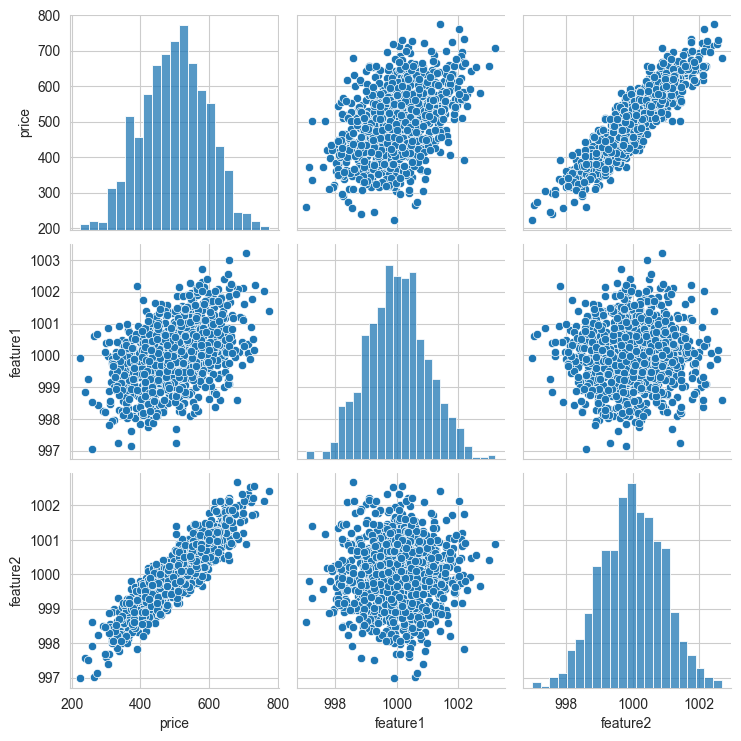

In [9]:
sns.pairplot(df);

In [10]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [11]:
from sklearn.model_selection import train_test_split

In [82]:
# X = df[['feature1', 'feature2']].values  # convert to array
# y = df['price'].values

In [12]:
X = df[['feature1', 'feature2']] 
y = df['price']

In [13]:
X

,feature1,feature2
0,999.788,999.766
1,998.862,1001.042
2,1000.070,998.844
3,999.952,1000.441
4,1000.446,1000.339
...,...,...
995,1000.019,999.673
996,998.855,1000.020
997,1001.452,998.848
998,1000.771,998.563


In [14]:
y

0     461.528
1     548.130
2     410.297
3     540.382
4     546.025
        ...  
995   476.526
996   457.313
997   456.721
998   403.316
999   599.367
Name: price, Length: 1000, dtype: float64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [16]:
X_train.shape

(700, 2)

In [17]:
X_test.shape

(300, 2)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [22]:
import tensorflow as tf

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation

In [90]:
# help(Sequential)

In [91]:
# help(Dense)

In [24]:
X_train.shape

(700, 2)

In [25]:
# First way to create model

model = Sequential([Input(shape = X_train.shape[1]),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

In [112]:
# Second way to create model (recommended)

model = Sequential()
#model.add(Input(shape = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.99890184,  0.5091398 ,  0.26148582,  0.47340727],
        [-0.66438484, -0.0832994 , -0.35957646, -0.796041  ]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.6124344 , -0.09575433,  0.05279189, -0.32253182],
        [ 0.5084289 , -0.0966149 , -0.52343106, -0.11914337],
        [-0.45076308, -0.564347  ,  0.7626601 ,  0.17622179],
        [ 0.7257413 ,  0.27991575,  0.35079867,  0.7429854 ]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_2/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.55861896,  0.2179249 ,  0.7438573 , -0.37851384],
        [ 0.8598369 , -0.7399706 , -0.8408604 ,  0.269934  ],
        [ 0.7167166 ,  0.23199028, -0.7368828 

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [28]:
model.compile(optimizer = "rmsprop", loss = "mse")

In [29]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 2s 3ms/step - loss: 256591.0781
Epoch 2/250
22/22 [==============================] - 0s 3ms/step - loss: 256381.4844
Epoch 3/250
22/22 [==============================] - 0s 4ms/step - loss: 256131.6562
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 255842.1875
Epoch 5/250
22/22 [==============================] - 0s 3ms/step - loss: 255506.2188
Epoch 6/250
22/22 [==============================] - 0s 7ms/step - loss: 255114.1250
Epoch 7/250
22/22 [==============================] - 0s 5ms/step - loss: 254661.0469
Epoch 8/250
22/22 [==============================] - 0s 4ms/step - loss: 254144.7031
Epoch 9/250
22/22 [==============================] - 0s 3ms/step - loss: 253563.0625
Epoch 10/250
22/22 [==============================] - 0s 3ms/step - loss: 252909.2969
Epoch 11/250
22/22 [==============================] - 0s 3ms/step - loss: 252184.0156
Epoch 12/250
22/22 [==============================] - 0s 3ms/st

In [30]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.6269443 ,  1.4764876 ,  0.16653514,  1.4446608 ],
        [-0.9961824 ,  3.3368416 , -0.43334845,  2.6281273 ]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(4,) dtype=float32, numpy=array([-0.3759363 ,  0.571947  , -0.09196372,  0.577749  ], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-2.7976766e-01, -1.5274988e-01,  4.3073978e-02,  1.8421832e-03],
        [ 2.6009715e+00, -1.7500140e-01, -5.3372943e-01,  1.9771587e+00],
        [-3.5206023e-01, -5.6750923e-01,  7.5346196e-01,  2.6608524e-01],
        [ 2.5492983e+00,  2.0092747e-01,  3.4004289e-01,  2.5576949e+00]],
       dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.5556454 , -0.07887734, -0.00970099,  0.5637526 ], dtype=float32)>,
 <tf.Variable 'dense_2/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 2.4326367 ,  2.096418  ,  2.615041  , -0

In [31]:
model.history.history

{'loss': [256591.078125,
  256381.484375,
  256131.65625,
  255842.1875,
  255506.21875,
  255114.125,
  254661.046875,
  254144.703125,
  253563.0625,
  252909.296875,
  252184.015625,
  251386.484375,
  250515.984375,
  249562.15625,
  248518.359375,
  247378.671875,
  246142.3125,
  244810.53125,
  243367.5,
  241817.828125,
  240155.3125,
  238376.984375,
  236461.84375,
  234425.484375,
  232271.546875,
  229971.59375,
  227520.984375,
  224930.0625,
  222204.140625,
  219317.125,
  216278.21875,
  213079.015625,
  209712.734375,
  206197.03125,
  202511.25,
  198661.4375,
  194652.5,
  190464.015625,
  186123.9375,
  181602.53125,
  176925.046875,
  172084.859375,
  167081.984375,
  161907.546875,
  156620.46875,
  151158.734375,
  145559.6875,
  139837.203125,
  133988.078125,
  128023.0390625,
  121961.828125,
  115782.25,
  109603.5234375,
  103271.828125,
  96935.3359375,
  90609.953125,
  84231.15625,
  77866.3984375,
  71577.5,
  65329.97265625,
  59223.80078125,
  53191.78

In [32]:
pd.DataFrame(model.history.history)

,loss
0,256591.078
1,256381.484
2,256131.656
3,255842.188
4,255506.219
...,...
245,24.138
246,24.405
247,24.262
248,24.213


<AxesSubplot:>

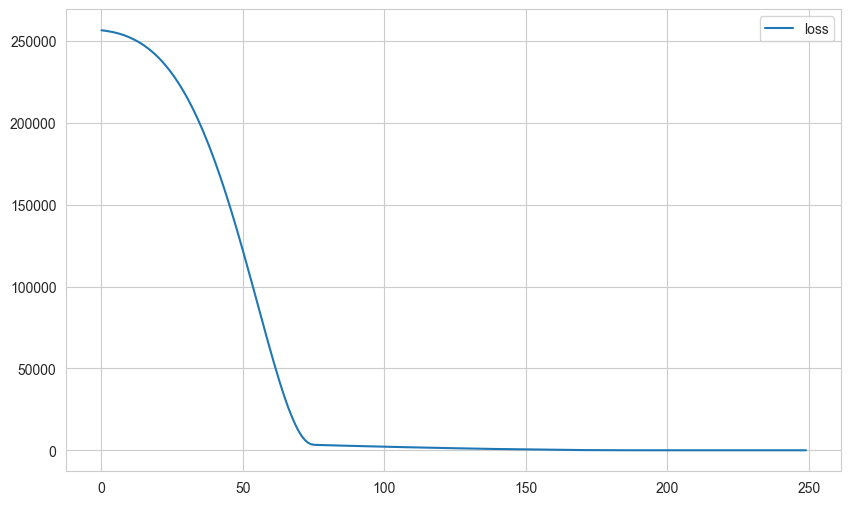

In [33]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 3000.0)

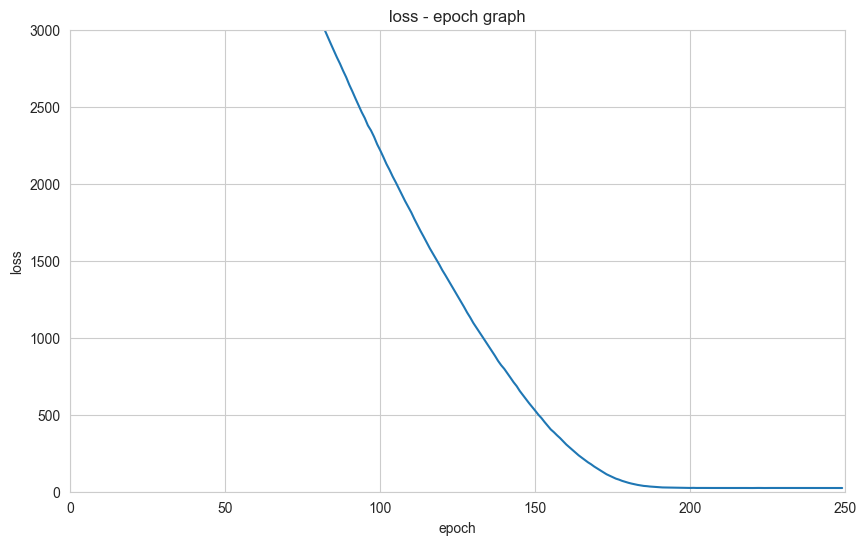

In [34]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

## Model Performance

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [36]:
model.evaluate(X_train, y_train, verbose=0)

23.926517486572266

In [37]:
model.evaluate(X_test, y_test, verbose=0)

25.711069107055664

In [38]:
y_pred = model.predict(X_test)
y_pred.shape

10/10 [==============================] - 0s 3ms/step


(300, 1)

In [39]:
y_test.shape

(300,)

In [40]:
y_pred.reshape(-1,).shape

(300,)

In [41]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
904,627.640,629.246
198,418.457,418.287
936,342.059,334.659
899,429.215,437.975
139,488.787,485.864
81,468.357,470.807
643,637.859,633.191
109,515.778,519.595
692,593.475,587.285
621,448.519,439.079


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

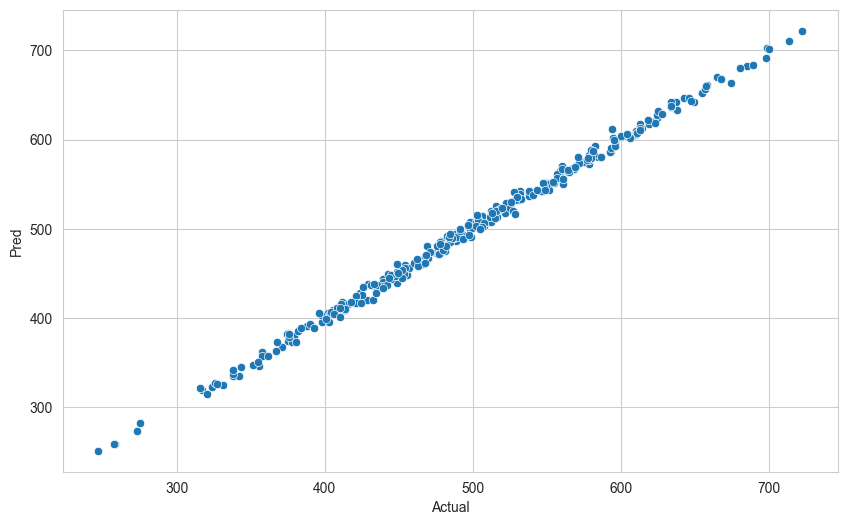

In [42]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [43]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [44]:
eval_metric(y_test, y_pred)

r2_score: 0.9970756390691056 
mae: 4.093553334023355 
mse: 25.711073905519193 
rmse: 5.070608829866409


## Final Model and Model Deployment

### Final Model Training

In [45]:
scaler = MinMaxScaler().fit(X)

In [46]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [47]:
X_scaled = scaler.transform(X)

In [48]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[1]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 2s 5ms/step - loss: 257415.4844
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 257346.9531
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 257272.5781
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 257188.6719
Epoch 5/250
32/32 [==============================] - 0s 6ms/step - loss: 257093.5625
Epoch 6/250
32/32 [==============================] - 0s 5ms/step - loss: 256987.9219
Epoch 7/250
32/32 [==============================] - 0s 5ms/step - loss: 256868.3438
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 256735.4375
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 256587.8438
Epoch 10/250
32/32 [==============================] - 0s 4ms/step - loss: 256423.6562
Epoch 11/250
32/32 [==============================] - 0s 3ms/step - loss: 256241.2656
Epoch 12/250
32/32 [==============================] - 0s 4ms/st

In [49]:
final_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


### Saving a Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).



In [50]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

In [69]:
#final_model.save("model_fake_reg") 

### Loading Model

In [51]:
from tensorflow.keras.models import load_model

In [52]:
model_fake_reg = load_model('model_fake_reg.h5')

In [53]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

## Prediction-1

In [54]:
sample = [[998, 1000]]

In [55]:
sample_scaled = scaler_fake_reg.transform(sample)

In [56]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 165ms/step


array([[422.34775]], dtype=float32)

## Prediction-2

In [57]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [58]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [59]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [60]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 66ms/step


array([[383.9188 ],
       [335.9721 ],
       [288.02536],
       [240.0787 ],
       [189.86182]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___